In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import random

## Group Assignment
### Team Number: 14
### Team Member Names: Max Cheng, Nathan Chu, Rahim Merchant, Matthew Yang
### Team Strategy Chosen: Safe

In [2]:
# Constant/Variable Declarations

# Since we must spend all our cash, let's check to make sure it's 0 at the end of our program
capital = 500000

# By the assignment requirements...
min_weight = 0.02
max_weight = 0.25

# Final output in Jupyter Notebook
Portfolio_Final = pd.DataFrame()

# DataFrame that our program should write to Stocks_Group_14.csv
Stocks_Final = pd.DataFrame()

# Date that we buy the stocks
buy_date = '2022-11-19'

In [3]:
'''
- Reads Tickers.csv as a DataFrame
- Turns the first (and only) column into a list
NOTE: Check what the CSV file we will be receiving for the comeptition looks like.
      We will probably have to update this line of code...
'''

# Tickers Easy.csv: Dummy list consisting of 25 large cap stocks in the s&p500
ticker_lst = pd.read_csv("Tickers Easy.csv", header=None)[0].tolist()

In [4]:
'''
TODO: Filter the list for invalid or impermissible tickers
- US listed stocks only (so nothing ending in .TO, but we would have to account for other cases too)
'''
american_tickers = ticker_lst

In [5]:
'''
- How do we store the ticker names of the stocks that failed to download?
- The dates at the bottom few rows look like like dividend payments? How do we remove them?
'''

start_date = '2022-01-01'
end_date = buy_date

data = yf.download(tickers = american_tickers,
                   # threads = True
                   # prepost = True
                   # group_by='ticker',
                   start=start_date,
                   end=end_date).dropna(how='all')
                   
data

[*********************100%***********************]  25 of 25 completed


Adj Close                                                 \
                  AAPL        ABBV        AMZN        BAC         CVX   
Date                                                                    
2022-01-03  180.959747  130.341812  170.404495  45.393047  115.113411   
2022-01-04  178.663071  130.091553  167.522003  47.172207  117.207954   
2022-01-05  173.910660  130.774918  164.356995  46.376007  117.970490   
2022-01-06  171.007523  130.158920  163.253998  47.309818  118.974335   
2022-01-07  171.176529  129.822052  162.554001  48.341923  120.682785   
...                ...         ...         ...        ...         ...   
2022-11-14  148.279999  151.740005   98.489998  37.759998  185.118027   
2022-11-15  150.039993  153.039993   98.940002  37.700001  186.606522   
2022-11-16  148.789993  151.869995   97.120003  37.360001  183.570007   
2022-11-17  150.720001  152.160004   94.849998  37.169998  184.089996   
2022-11-18  151.289993  154.979996   94.139999  37.189999  182.990005   

                                                                        ...  \
                  GOOG       GOOGL          HD         JNJ         JPM  ...   
Date                                                                    ...   
2022-01-03  145.074493  144.991501  401.023010  168.227264  156.752411  ...   
2022-01-04  144.416504  144.399506  405.144684  167.776154  162.694839  ...   
2022-01-05  137.653503  137.774994  399.649078  168.894150  159.720444  ...   
2022-01-06  137.550995  137.747498  398.196686  168.315536  161.417328  ...   
2022-01-07  137.004501  137.016998  386.273132  170.590744  163.016678  ...   
...                ...         ...         ...         ...         ...  ...   
2022-11-14   96.029999   95.699997  306.920013  171.910004  133.910004  ...   
2022-11-15   98.720001   98.440002  311.929993  172.389999  132.940002  ...   
2022-11-16   98.989998   98.849998  314.910004  173.460007  133.119995  ...   
2022-11-17   98.500000   98.360001  311.440002  174.860001  132.539993  ...   
2022-11-18   97.800003   97.430000  313.179993  176.199997  133.839996  ...   

              Volume                                                   \
                MSFT      NVDA      PEP       PFE       PG       TSLA   
Date                                                                    
2022-01-03  28865100  39154700  5488900  57219200  9317300  103931400   
2022-01-04  32674300  52715400  4717600  66993100  9253800  100248300   
2022-01-05  40054300  49806400  6564600  52956400  9330200   80119800   
2022-01-06  39646100  45418600  4288700  37000400  7556000   90336600   
2022-01-07  32720000  40993900  4916000  27703400  6098500   84164700   
...              ...       ...      ...       ...      ...        ...   
2022-11-14  31123300  52785200  5633000  26143000  8516200   92226600   
2022-11-15  31390100  54587600  5153600  25440500  7732400   91293800   
2022-11-16  24093300  64954700  4701100  15822200  6193700   66567600   
2022-11-17  23123500  71089400  3920300  13231100  5186300   64336000   
2022-11-18  27591800  49167700  4498100  20664300  5671400   75904900   

                                                   
                UNH         V       WMT       XOM  
Date                                               
2022-01-03  3033600   7694500   6902200  24282400  
2022-01-04  3908100  10629300  11310000  38584000  
2022-01-05  3921100   9594600  11806000  34033300  
2022-01-06  6555200   7877500   7276300  30668500  
2022-01-07  5494200  10702100   6574500  23985400  
...             ...       ...       ...       ...  
2022-11-14  5238400   5796100  12508600  20858300  
2022-11-15  5103800   7316100  25516200  19373800  
2022-11-16  3430800   6125300  10864400  13591000  
2022-11-17  4246300   5385600   8263800  12425900  
2022-11-18  3566000   8027600   6325300  15407000  

[223 rows x 150 columns]

In [6]:
'''
TODO: Second filtering iteration
- Remove stocks that failed downloads
- Average MONTHLY volume of at least 200,000 shares from Jan 01, 2022 to Oct 31, 2022
'''

filtered_tickers = american_tickers

In [7]:
'''
TODO: Calculations
Let's discuss how we want to approach this from a finance POV before committing to deep into anything

Some ideas...
1. Fetch beta for each stock, find a combination of 25 that sum to a number close to 0
- Pros: Seems easy enough (famous last words)
- Cons: Everything is becoming more correlated now, we may have to look at individual correlations

2. Create a correlation matrix (Correlation of each stock with each other stock), then pick the
   PAIRS that sum to the lowest number. Ideally, we would have a portfolio of pairs of stocks,
   with the 2 stocks in each pair having perfect NEGATIVE correlation. Thus the portfolio never
   fluctuates.
'''

portfolio_stocks = filtered_tickers[1:]

In [8]:
def generate_allocation(portfolio_size):
    allocation = []
    
    for i in range(portfolio_size):
        n = random.randint(20, 100)
        allocation.append(n)

    allocation_sum = np.sum(allocation)

    for j in range(portfolio_size):
        allocation[j] = allocation[j]/allocation_sum
    
    if min(allocation) < min_weight:
        return generate_allocation(portfolio_size)
    elif max(allocation) > max_weight:
        return generate_allocation(portfolio_size)
    else:
        return allocation

generate_allocation(len(portfolio_stocks))

[0.04506699147381242,
 0.04933008526187576,
 0.03349573690621194,
 0.052984165651644335,
 0.03714981729598051,
 0.05602923264311815,
 0.0389768574908648,
 0.04202192448233861,
 0.03714981729598051,
 0.0535931790499391,
 0.030450669914738125,
 0.0341047503045067,
 0.04933008526187576,
 0.03654080389768575,
 0.05663824604141291,
 0.020706455542021926,
 0.028623629719853837,
 0.04141291108404385,
 0.0389768574908648,
 0.05237515225334957,
 0.05663824604141291,
 0.044457978075517664,
 0.040194884287454324,
 0.023751522533495738]

In [9]:
def get_returns(stocks):
    daily_returns = pd.DataFrame()
    temp = pd.DataFrame()
    
    for stock in stocks:
        daily_returns[stock] = data['Adj Close'].loc[start_date:end_date][stock]
    
    weekly_returns = daily_returns.resample('W').ffill()
    return weekly_returns.pct_change().dropna()
    
get_returns(portfolio_stocks)

,MSFT,AMZN,TSLA,GOOG,GOOGL,UNH,JNJ,XOM,JPM,META,...,CVX,LLY,MA,ABBV,PFE,MRK,PEP,BAC,KO,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-16,-0.012228,-0.002559,0.022055,0.020306,0.017980,0.022002,-0.035125,0.043409,-0.055456,0.000331,...,0.031433,-0.059268,0.006736,0.017793,-0.013819,0.013449,0.008961,-0.025823,0.017570,0.001173
2022-01-23,-0.045680,-0.120237,-0.100714,-0.069352,-0.065450,-0.016045,-0.017695,0.004174,-0.081132,-0.086562,...,-0.015896,-0.004342,-0.045843,-0.028630,-0.039309,-0.017203,-0.008085,-0.062409,-0.015312,-0.033572
2022-01-30,0.041313,0.009359,-0.103348,0.024579,0.023011,0.010603,0.041972,0.043093,0.010546,-0.004816,...,0.029154,0.008393,0.077250,0.045007,0.036997,0.011503,-0.008897,0.021149,0.006452,-0.019046
2022-02-06,-0.007526,0.094886,0.090943,0.072973,0.074555,0.036712,-0.000931,0.081430,0.040584,-0.214179,...,0.040349,-0.011546,-0.000811,0.019794,-0.024480,-0.028925,-0.001042,0.052540,0.001972,0.013162
2022-02-13,-0.035628,-0.027569,-0.068579,-0.062133,-0.062882,-0.010431,-0.022840,-0.003818,0.008914,-0.073980,...,0.021563,-0.026953,-0.032522,0.009669,-0.041887,-0.024440,-0.022668,-0.007457,-0.010991,-0.028709
2022-02-20,-0.022081,-0.004514,-0.003512,-0.027306,-0.028891,-0.021584,-0.019685,-0.035532,-0.011564,-0.060988,...,-0.028739,0.023641,0.000487,0.014224,-0.044309,-0.003523,-0.005161,-0.040901,0.037320,0.019656
2022-02-27,0.032577,0.007778,-0.054972,0.031058,0.031107,0.016973,0.016161,0.006205,-0.027409,0.020955,...,0.052166,0.043860,-0.002325,0.038256,-0.016691,-0.000655,0.003995,-0.020452,0.004957,-0.011668
2022-03-06,-0.025058,-0.052979,0.035092,-0.017823,-0.018987,0.048134,0.020964,0.080293,-0.091708,-0.049506,...,0.130147,0.047917,-0.103850,0.006821,0.019489,0.019785,-0.009145,-0.085957,-0.004455,0.047221
2022-03-13,-0.033775,-0.000800,-0.051223,-0.012462,-0.015435,-0.028780,-0.000767,0.009870,-0.040997,-0.062231,...,0.077214,0.013048,-0.018049,-0.009963,0.033299,0.005525,-0.072519,-0.015140,-0.074317,-0.005251


In [10]:
def calculate_return(stocks, returns, allocation):
    '''
    params
    stocks: list of stocks
    returns: dataframe of daily returns
    allocation: list of weightings
    '''
    
    portfolio_weekly_return = pd.DataFrame()
    daily_return = 0
    count = 0
    
    for stock in stocks:
        portfolio_weekly_return[stock] = returns[stock] * allocation[count]
        count += 1
        
    portfolio_weekly_return['Portfolio Return'] = portfolio_weekly_return.sum(axis=1)
    
    return portfolio_weekly_return['Portfolio Return']

calculate_return(portfolio_stocks, 
                 get_returns(portfolio_stocks), 
                 generate_allocation(len(portfolio_stocks)))

Date
2022-01-16   -0.001556
2022-01-23   -0.040042
2022-01-30    0.022986
2022-02-06    0.014575
2022-02-13   -0.022707
2022-02-20   -0.009565
2022-02-27    0.002013
2022-03-06    0.000563
2022-03-13   -0.015236
2022-03-20    0.056875
2022-03-27    0.014686
2022-04-03    0.005001
2022-04-10    0.009234
2022-04-17   -0.021562
2022-04-24   -0.030129
2022-05-01   -0.010906
2022-05-08    0.003033
2022-05-15   -0.011698
2022-05-22   -0.029283
2022-05-29    0.058909
2022-06-05   -0.013025
2022-06-12   -0.039234
2022-06-19   -0.055059
2022-06-26    0.067557
2022-07-03   -0.017382
2022-07-10    0.020347
2022-07-17   -0.005476
2022-07-24    0.012423
2022-07-31    0.031801
2022-08-07   -0.011567
2022-08-14    0.026107
2022-08-21   -0.000848
2022-08-28   -0.035303
2022-09-04   -0.027027
2022-09-11    0.032016
2022-09-18   -0.038637
2022-09-25   -0.036850
2022-10-02   -0.019200
2022-10-09    0.018608
2022-10-16   -0.000092
2022-10-23    0.047771
2022-10-30    0.033558
2022-11-06   -0.027490
2022-1

In [11]:
portfolio_performance = pd.DataFrame()
portfolio_expected_returns = []
portfolio_risks = []

number_of_portfolios = 50
weights = []
weekly_returns = get_returns(portfolio_stocks)

for i in range(number_of_portfolios):
    weights.append(generate_allocation(len(portfolio_stocks)))
    temp_portfolio = calculate_return(portfolio_stocks, 
                                      weekly_returns, 
                                      weights[i])
    portfolio_expected_returns.append(np.mean(temp_portfolio))
    portfolio_risks.append(np.std(temp_portfolio))
    

portfolio_performance['Expected Return'] = portfolio_expected_returns
portfolio_performance['Risk'] = portfolio_risks
portfolio_performance

,Expected Return,Risk
0,-0.001311,0.031261
1,-0.001424,0.031246
2,-0.001887,0.033164
3,-0.001944,0.031724
4,-0.001644,0.031898
5,-0.001354,0.032223
6,-0.001233,0.030249
7,-0.000799,0.030578
8,-0.001578,0.030908
9,-0.001535,0.030888


In [12]:
least_risky_portfolio = weights[portfolio_performance.loc[portfolio_performance['Risk'] 
                                                          == min(portfolio_performance['Risk'])].index.tolist()[0]]
least_risky_portfolio

[0.04695919938414165,
 0.03233256351039261,
 0.02617397998460354,
 0.03464203233256351,
 0.05696689761354888,
 0.0731331793687452,
 0.07621247113163972,
 0.036181678214010776,
 0.023094688221709007,
 0.025404157043879907,
 0.04311008468052348,
 0.06466512702078522,
 0.025404157043879907,
 0.02848344880677444,
 0.046189376443418015,
 0.036181678214010776,
 0.037721324095458045,
 0.03926096997690531,
 0.020015396458814474,
 0.049268668206312545,
 0.053117782909930716,
 0.04695919938414165,
 0.046189376443418015,
 0.03233256351039261]

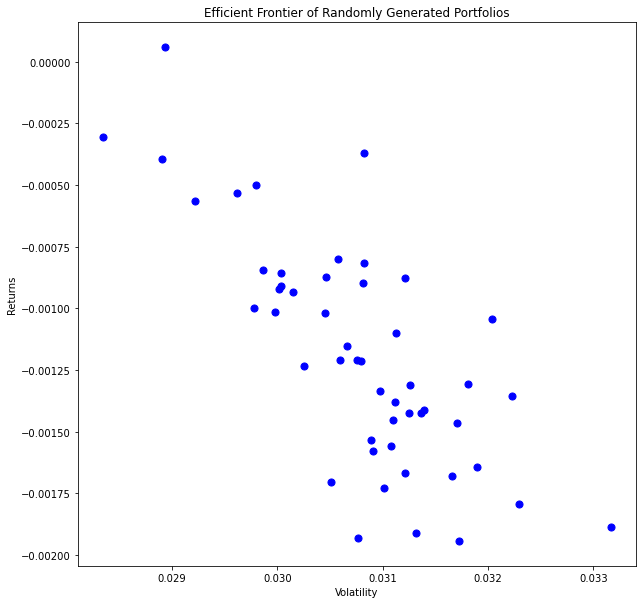

In [13]:
'''
NOTE: This scatter plot has been Policy 71'ed from last year's safe group.
MAKE A COMPLETELY NEW GRAPH BEFORE SUBMITTING!!!
'''

plt.subplots(figsize=[10, 10])

plt.scatter(
    x=portfolio_performance['Risk'], y=portfolio_performance['Expected Return'], s=10, alpha=0.7
)

plt.scatter(
    portfolio_performance['Risk'], portfolio_performance['Expected Return'], color="b", marker=".", s=200
)

plt.title("Efficient Frontier of Randomly Generated Portfolios")
plt.xlabel("Volatility")
plt.ylabel("Returns")

plt.show()

In [14]:
data = yf.download(tickers = portfolio_stocks,
                   start=start_date,
                   end=end_date).dropna(how='all')

Portfolio_Final.index = range(1,len(portfolio_stocks)+1)
Portfolio_Final["Ticker"] = portfolio_stocks
Portfolio_Final["Price"] = data['Adj Close'].iloc[len(data)-1].tolist()
Portfolio_Final["Weight"] = least_risky_portfolio
Portfolio_Final["Value"] = Portfolio_Final["Weight"] * capital
Portfolio_Final["Shares"] = Portfolio_Final["Value"] / Portfolio_Final["Price"]

Portfolio_Final = Portfolio_Final[["Ticker", "Price", "Shares", "Value", "Weight"]]

if Portfolio_Final["Value"].sum() == capital and Portfolio_Final["Weight"].sum() == 1:
    print ("Total adds to $500,000 and weights add to 100%")

[*********************100%***********************]  24 of 24 completed
Total adds to $500,000 and weights add to 100%


In [15]:
Portfolio_Final

,Ticker,Price,Shares,Value,Weight
1,MSFT,154.979996,151.500841,23479.599692,0.046959
2,AMZN,94.139999,171.725960,16166.281755,0.032333
3,TSLA,37.189999,351.895415,13086.989992,0.026174
4,GOOG,182.990005,94.655531,17321.016166,0.034642
5,GOOGL,97.800003,291.241799,28483.448807,0.056967
6,UNH,97.430000,375.311399,36566.589684,0.073133
7,JNJ,313.179993,121.675191,38106.235566,0.076212
8,XOM,176.199997,102.672187,18090.839107,0.036182
9,JPM,133.839996,86.277230,11547.344111,0.023095
10,META,61.139999,207.753985,12702.078522,0.025404


In [16]:
Stocks_Final = Portfolio_Final[["Ticker", "Shares"]]
Stocks_Final

,Ticker,Shares
1,MSFT,151.500841
2,AMZN,171.725960
3,TSLA,351.895415
4,GOOG,94.655531
5,GOOGL,291.241799
6,UNH,375.311399
7,JNJ,121.675191
8,XOM,102.672187
9,JPM,86.277230
10,META,207.753985


In [17]:
# Write to CSV

Stocks_Final.to_csv("Stocks_Group_14.csv")

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Max Cheng, Nathan Chu, Rahim Merchant, Matthew Yang